## Preprocessing

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

/home/chrislu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

## Create Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
model = Sequential()

In [8]:
# Set Convolution layer1
model.add(Conv2D(filters=16,  ## filter number is 16
                 kernel_size=(5, 5),
                 padding='same',
                 input_shape=(28, 28, 1),
                 activation='relu'))

In [10]:
# Set pooling1
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
# Set Convolution layer2
model.add(Conv2D(filters=36,  ## filter number is 16
                 kernel_size=(5, 5),
                 padding='same',
                 activation='relu'))

In [12]:
# Set pooling2
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
# Add Dropout 0.25 avoid overfitting
model.add(Dropout(0.25))

In [15]:
# Add Flatten layer
model.add(Flatten())

In [16]:
# Set hidden layer
model.add(Dense(128, activation='relu'))

In [17]:
# Dropout
model.add(Dropout(0.5))

In [18]:
# Set output layer
model.add(Dense(10, activation='softmax'))

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

## Training

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history = model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot, validation_split=0.2,  # 48000 train 12000 validation
                        epochs=10, batch_size=300, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 28s - loss: 0.4887 - acc: 0.8474 - val_loss: 0.0956 - val_acc: 0.9718
Epoch 2/10
 - 29s - loss: 0.1407 - acc: 0.9583 - val_loss: 0.0634 - val_acc: 0.9803
Epoch 3/10
 - 29s - loss: 0.1033 - acc: 0.9692 - val_loss: 0.0512 - val_acc: 0.9843
Epoch 4/10
 - 29s - loss: 0.0828 - acc: 0.9758 - val_loss: 0.0470 - val_acc: 0.9853
Epoch 5/10
 - 27s - loss: 0.0718 - acc: 0.9780 - val_loss: 0.0404 - val_acc: 0.9873
Epoch 6/10
 - 28s - loss: 0.0638 - acc: 0.9812 - val_loss: 0.0393 - val_acc: 0.9881
Epoch 7/10
 - 25s - loss: 0.0562 - acc: 0.9827 - val_loss: 0.0458 - val_acc: 0.9859
Epoch 8/10
 - 27s - loss: 0.0512 - acc: 0.9838 - val_loss: 0.0336 - val_acc: 0.9903
Epoch 9/10
 - 27s - loss: 0.0444 - acc: 0.9862 - val_loss: 0.0338 - val_acc: 0.9903
Epoch 10/10
 - 27s - loss: 0.0419 - acc: 0.9870 - val_loss: 0.0339 - val_acc: 0.9902


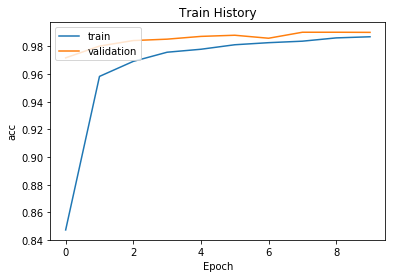

In [23]:
# show result
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history, 'acc', 'val_acc')

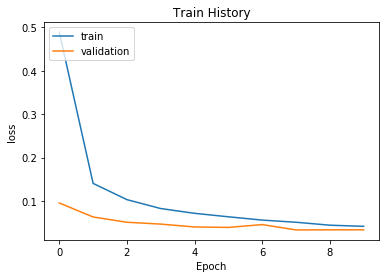

In [24]:
show_train_history(train_history, 'loss', 'val_loss')

## Evaluation Error

In [25]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)

10000/10000 [==============================] - 2s 206us/step


In [26]:
scores[1]

0.991

## Prediction

In [27]:
prediction = model.predict_classes(x_Test4D_normalize)

In [28]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [29]:
import pandas as pd
pd.crosstab(y_Test, prediction,
            rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,2,1,1026,0,1,0,0,2,0,0
3,0,0,0,1003,0,3,0,2,2,0
4,0,0,0,0,976,0,1,0,1,4
5,1,0,0,4,0,884,2,0,0,1
6,4,2,0,0,3,1,948,0,0,0
7,0,2,3,1,0,0,0,1020,1,1
8,5,1,3,2,1,1,0,2,955,4
